Learning rate:  0.01
Iterations:  65


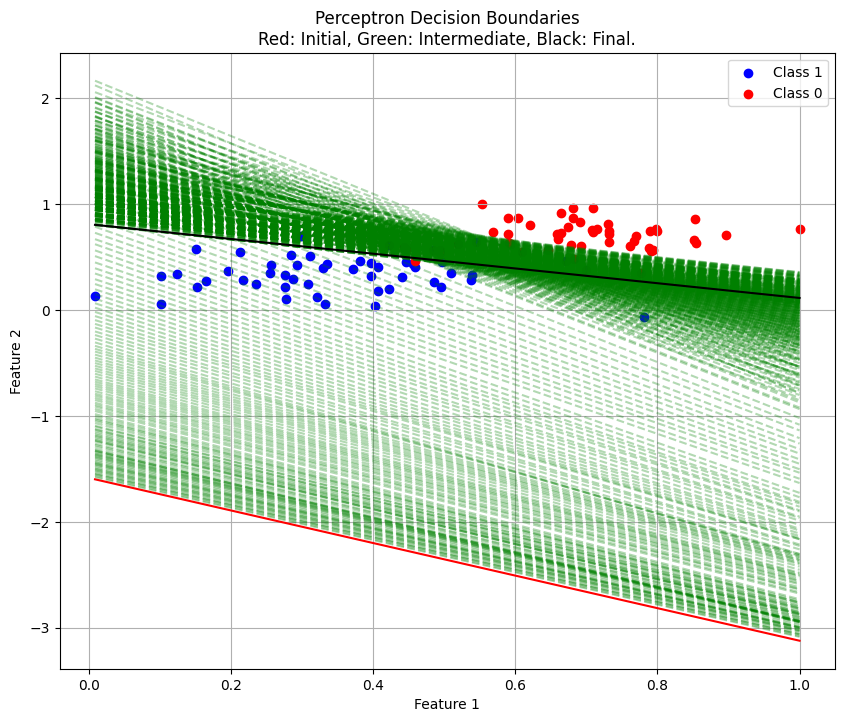


Final weights: [-0.18901824 -0.27133106]
Final bias: 0.21982661195828218


In [15]:
# PART 1 (RUN THIS FIRST)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

# Initialize random weights and bias
np.random.seed(65)  # For reproducibility
w = np.random.randn(2)
b = np.random.randn()

# Learning rate
r = 0.01
print("Learning rate: ", r)
# Number of iterations
epochs = 65
print("Iterations: ", epochs)

# plotting function
def plot_decision_boundary(w, b, color='r', linestyle='-', alpha=1.0):
    # Create points for the line
    x1 = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    # Using w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
    x2 = -(w[0]*x1 + b)/w[1]
    plt.plot(x1, x2, color=color, linestyle=linestyle, alpha=alpha)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')

# Plot initial decision boundary
plot_decision_boundary(w, b, color='red', linestyle='-', alpha=1.0)

# Training loop
for epoch in range(epochs):
    misclassified = 0
    for i in range(len(X)):
        # Calculate classification
        classification = 1 if np.dot(w, X[i]) + b > 0 else 0
        
        # Update weights and bias if misclassified
        if classification != y[i]:
            misclassified += 1
            if classification == 0:  # Should have been 1
                w = w + r * X[i]
                b = b + r
            else:  # Should have been 0
                w = w - r * X[i]
                b = b - r
                
            # Plot intermediate decision boundaries
            if epoch < epochs-1:  # Not the last epoch
                plot_decision_boundary(w, b, color='green', linestyle='--', alpha=0.3)
    
    # If no misclassifications, break
    if misclassified == 0:
        print(f"Converged at epoch {epoch}")
        break

# Plot final decision boundary
plot_decision_boundary(w, b, color='black', linestyle='-', alpha=1.0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundaries\nRed: Initial, Green: Intermediate, Black: Final.')
plt.legend()
plt.grid(True)
plt.show()

print("\nFinal weights:", w)
print("Final bias:", b)

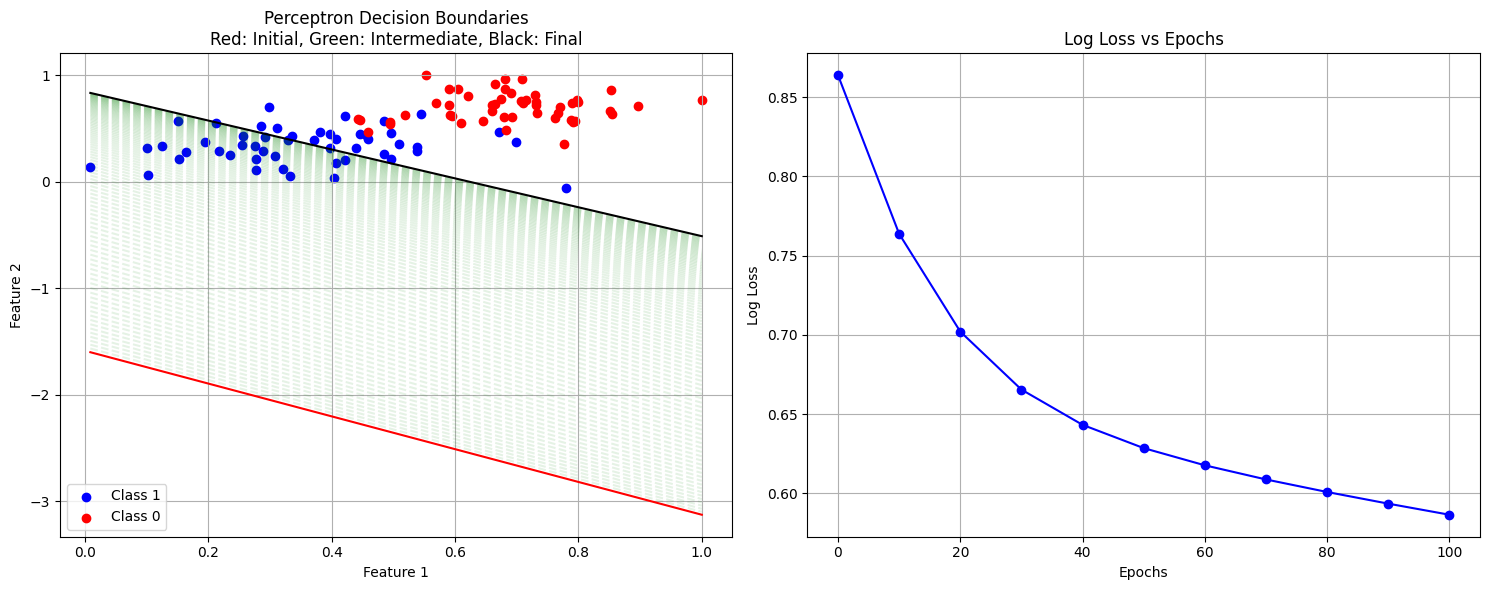

Final weights: [-0.83872463 -0.6187997 ]
Final bias: 0.522474806361226
Final log loss: 0.5864476931441649


In [16]:
# PART 2
# Sigmoid function for prediction
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function
def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function to plot decision boundary
def plot_decision_boundary(w, b, color='r', linestyle='-', alpha=1.0):
    x1 = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    x2 = -(w[0]*x1 + b)/w[1]
    plt.plot(x1, x2, color=color, linestyle=linestyle, alpha=alpha)

# Initialize parameters (in case you want them to be different from part 1)
np.random.seed(65)
w = np.random.randn(2)
b = np.random.randn()

# Hyperparameters (in case you want them to be different from part 1)
r = 0.1
epochs = 100

# Lists to store log loss values
log_loss_history = []
epoch_points = list(range(0, epochs+1, 10))  # Every 10 epochs

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot for decision boundaries
plt.subplot(1, 2, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')

# Plot initial decision boundary
plot_decision_boundary(w, b, color='red', linestyle='-', alpha=1.0)

# Training loop
for epoch in range(epochs + 1):
    # Forward pass
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Compute and store log loss every 10 epochs
    if epoch % 10 == 0:
        current_loss = compute_log_loss(y, y_pred)
        log_loss_history.append(current_loss)
    
    # Gradient descent
    error = y - y_pred
    b = b + r * np.mean(error)
    w = w + r * np.dot(X.T, error) / len(X)
    
    # Plot intermediate decision boundaries
    if epoch < epochs:
        plot_decision_boundary(w, b, color='green', linestyle='--', alpha=0.1)

# Plot final decision boundary
plot_decision_boundary(w, b, color='black', linestyle='-', alpha=1.0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundaries\nRed: Initial, Green: Intermediate, Black: Final')
plt.legend()
plt.grid(True)

# Second subplot for log loss
plt.subplot(1, 2, 2)
plt.plot(epoch_points, log_loss_history, 'b-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Final weights:", w)
print("Final bias:", b)
print("Final log loss:", log_loss_history[-1])